In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import seaborn as sns
%matplotlib inline

# AirBNB Berlin dataset

## Data cleaning and preparation (listings.csv)

For this analysis I use Berlin AirBnB dataset from the official AirBnB website: http://insideairbnb.com/get-the-data.html

In [2]:
listings = pd.read_csv('listings_feb19.csv.gz')
listings.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20190308173525,2019-03-08,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,f,f,moderate,f,f,7,7,0,0,3.45


In [3]:
# Checking the number of observations and columns
listings.shape 

(23614, 106)

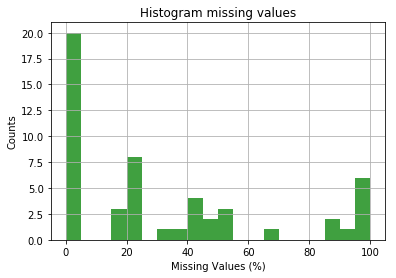

In [4]:
# Checking the dataset for missing values
missing = listings.isnull().sum()
missing = missing[missing > 0]/(listings.shape[0]) * 100
missing.sort_values(inplace=True)

#Plot mit der Verteilung von missing values
plt.hist(missing, bins=20, facecolor='g', alpha=0.75)


plt.xlabel('Missing Values (%)')
plt.ylabel('Counts')
plt.title('Histogram missing values')
plt.grid(True)
plt.show()

In [5]:
# Search for variables with more than 60% missings
missing_60 = [col for col in listings.columns if (listings[col].isnull().sum()/listings.shape[0]) * 100 > 60]
print(missing_60)

['notes', 'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate', 'square_feet', 'weekly_price', 'monthly_price', 'license', 'jurisdiction_names']


In [6]:
# Droping variables with more then 60% missings
for col in missing_60:
    listings.drop(col, axis=1, inplace=True)

In [7]:
# There are still 96 columns
listings.shape

(23614, 96)

In [8]:
listings[listings.duplicated(['listing_url'], keep=False)]#checking for duplicates

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


In [9]:
list(listings) # checking which columns are left

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 '

In [10]:
# Removing columns not necessary for the analysis
removed = ['listing_url','number_of_reviews','experiences_offered','space','scrape_id',
 'number_of_reviews_ltm','summary','description','host_listings_count','name', 'transit',
 'first_review','neighborhood_overview','host_neighbourhood','neighbourhood_cleansed',
 'last_review','calculated_host_listings_count','state','neighbourhood',
 'calculated_host_listings_count_entire_homes','smart_location','city','room_type',
 'calculated_host_listings_count_private_rooms','cleaning_fee','extra_people',
 'calculated_host_listings_count_shared_rooms','review_scores_accuracy','has_availability',
 'review_scores_cleanliness','calendar_last_scraped','calendar_updated','zipcode',
 'review_scores_checkin','last_scraped',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'requires_license',
 'instant_bookable',
 'is_business_travel_ready',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification','interaction',
 'house_rules',
 'picture_url',
 'host_id',
 'host_url',
 'host_name','access',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url','is_location_exact','host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street','bed_type',
 'amenities','minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'market',
 'country_code',
 'country',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365', 'latitude',
 'longitude']

In [11]:
listings2 = listings.drop(removed, axis=1)

In [12]:
listings2.shape

(23614, 15)

In [13]:
list(listings2)

['id',
 'host_total_listings_count',
 'neighbourhood_group_cleansed',
 'property_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'security_deposit',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'review_scores_rating',
 'reviews_per_month']

In [14]:
listings2.head(1)

,id,host_total_listings_count,neighbourhood_group_cleansed,property_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,guests_included,minimum_nights,maximum_nights,review_scores_rating,reviews_per_month
0,2015,7.0,Mitte,Guesthouse,3,1.0,1.0,2.0,$60.00,$250.00,1,6,1125,93.0,3.45


In [15]:
listings2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23614 entries, 0 to 23613
Data columns (total 15 columns):
id                              23614 non-null int64
host_total_listings_count       23593 non-null float64
neighbourhood_group_cleansed    23614 non-null object
property_type                   23614 non-null object
accommodates                    23614 non-null int64
bathrooms                       23579 non-null float64
bedrooms                        23592 non-null float64
beds                            23563 non-null float64
price                           23614 non-null object
security_deposit                14073 non-null object
guests_included                 23614 non-null int64
minimum_nights                  23614 non-null int64
maximum_nights                  23614 non-null int64
review_scores_rating            18756 non-null float64
reviews_per_month               19242 non-null float64
dtypes: float64(6), int64(5), object(4)
memory usage: 2.7+ MB


In [16]:
# Checking missing values in rows
missing_rows = listings2.isnull().sum(axis=1)

In [17]:
missing_rows.nlargest(20) #largest missing values for each row

547      5
578      5
839      5
841      5
842      5
1306     5
1969     5
42       4
1052     4
4217     4
4829     4
4900     4
4905     4
4909     4
4929     4
5529     4
7978     4
8152     4
9886     4
19310    4
dtype: int64

Text(0,0.5,'rows')

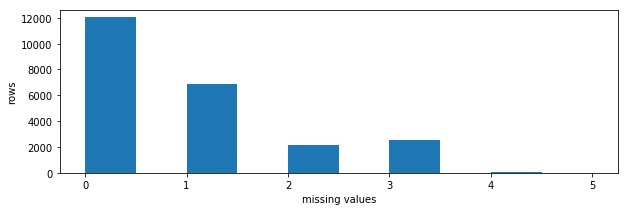

In [18]:
plt.figure(figsize=(10,3))
plt.hist(missing_rows, bins=10)
plt.xlabel('missing values')
plt.ylabel('rows')


There are relatively few missing values in the rows. Therefore I will impute some numbers for them later in the analysis. 

In [19]:
cat_df = listings2.select_dtypes(include=['object']) #checking not numerical features

In [20]:
cat_df.head(1)

,neighbourhood_group_cleansed,property_type,price,security_deposit
0,Mitte,Guesthouse,$60.00,$250.00


In [21]:
# Turning price and security_deposit features into numeric ones and removig the $ sign
object_feat = ['price','security_deposit']
for col in object_feat:
    listings2[col] = listings2[col].apply(lambda x : x[1:].replace(",", "") if str(x).startswith("$") else x)

listings2[object_feat] = listings2[object_feat].astype(float)

In [22]:
cat_df2 = listings2.select_dtypes(include=['object']) # sanity check

In [23]:
cat_df2.head(1)

,neighbourhood_group_cleansed,property_type
0,Mitte,Guesthouse


In [24]:
listings2.head(1)

,id,host_total_listings_count,neighbourhood_group_cleansed,property_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,guests_included,minimum_nights,maximum_nights,review_scores_rating,reviews_per_month
0,2015,7.0,Mitte,Guesthouse,3,1.0,1.0,2.0,60.0,250.0,1,6,1125,93.0,3.45


I also create dummy variables for the future regression analysis

In [25]:
dummy1 = pd.get_dummies(listings2['neighbourhood_group_cleansed'])

In [26]:
listings3 = pd.concat([listings2, dummy1], axis=1)

In [27]:
dummy2 = pd.get_dummies(listings2['property_type'])

In [28]:
listings4 = pd.concat([listings3, dummy2], axis=1)

In [29]:
listings4.head(1)# sanity check

,id,host_total_listings_count,neighbourhood_group_cleansed,property_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,...,Pension (South Korea),Resort,Serviced apartment,Tiny house,Tipi,Townhouse,Train,Treehouse,Vacation home,Villa
0,2015,7.0,Mitte,Guesthouse,3,1.0,1.0,2.0,60.0,250.0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
listings4.shape

(23614, 62)

In [31]:
listings4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23614 entries, 0 to 23613
Data columns (total 62 columns):
id                              23614 non-null int64
host_total_listings_count       23593 non-null float64
neighbourhood_group_cleansed    23614 non-null object
property_type                   23614 non-null object
accommodates                    23614 non-null int64
bathrooms                       23579 non-null float64
bedrooms                        23592 non-null float64
beds                            23563 non-null float64
price                           23614 non-null float64
security_deposit                14073 non-null float64
guests_included                 23614 non-null int64
minimum_nights                  23614 non-null int64
maximum_nights                  23614 non-null int64
review_scores_rating            18756 non-null float64
reviews_per_month               19242 non-null float64
Charlottenburg-Wilm.            23614 non-null uint8
Friedrichshain-Kreuzberg 

In [32]:
# Renaming columns for better clarity
listings4.rename(columns = {'neighbourhood_group_cleansed':'neighbourhood'}, inplace = True)

In [33]:
listings4.head(1)

,id,host_total_listings_count,neighbourhood,property_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,...,Pension (South Korea),Resort,Serviced apartment,Tiny house,Tipi,Townhouse,Train,Treehouse,Vacation home,Villa
0,2015,7.0,Mitte,Guesthouse,3,1.0,1.0,2.0,60.0,250.0,...,0,0,0,0,0,0,0,0,0,0


## Analysis and Business Questions: business and data understanding

    Based on the above Berlin AirBnB data I will try to answer following questions:
    
    1. Which neighbourhoods in Berlin have most accomodations on AirBnB?
    
    2. Which neighbourhoods have best user ratings?
    
    3. Which neighbourhoods have the best/lowest price in Berlin?
    
    4. What are the most important factors for the price 
       of an AirBnB accommodation in Berlin?
    

### 1. What are the most frequent neighbourhoods for accommodations on AirBnB in Berlin?

In [34]:
# Providing pandas series for each neigbourhood
neighbourhoods = listings4.neighbourhood.value_counts()

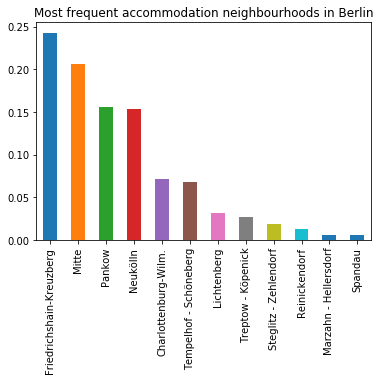

In [35]:
# Plotting the values
(neighbourhoods/listings4.shape[0]).plot(kind="bar");
plt.title("Most frequent accommodation neighbourhoods in Berlin");

### 2. Which neighbourhoods have the best ratings?

In [36]:
# Which neighbourhoods have the highest average ratings?
listings4.groupby(['neighbourhood']).mean()['review_scores_rating']

neighbourhood
Charlottenburg-Wilm.        93.757364
Friedrichshain-Kreuzberg    94.716350
Lichtenberg                 94.428312
Marzahn - Hellersdorf       95.262136
Mitte                       93.760786
Neukölln                    94.691003
Pankow                      94.874580
Reinickendorf               94.251163
Spandau                     94.368421
Steglitz - Zehlendorf       95.662791
Tempelhof - Schöneberg      94.946032
Treptow - Köpenick          95.068607
Name: review_scores_rating, dtype: float64

In [37]:
highest_rating = listings4.groupby(['neighbourhood']).mean()['review_scores_rating']


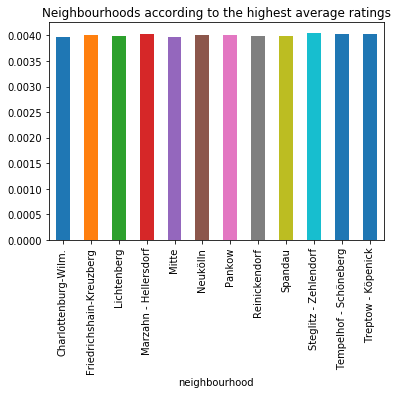

In [38]:
(highest_rating/listings4.shape[0]).plot(kind="bar");
plt.title("Neighbourhoods according to the highest average ratings");

There are almost no differences in ratings between neighbourhoods. 

### 3. Which neighbourhoods have the best price?

First I check for the outliers in price

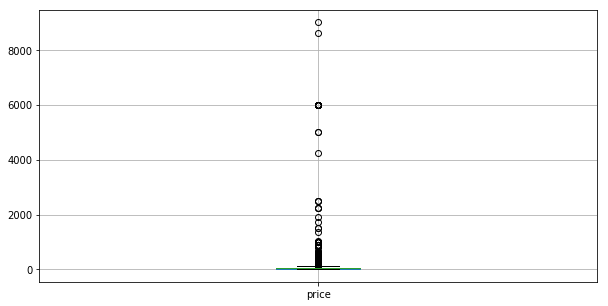

In [39]:
listings4.boxplot(column='price', figsize = (10,5))

There are some outliers, therefore I will compute the mean and median for the price. 

In [40]:
# Neighborhoods listed by the average price
listings4.groupby(['neighbourhood']).mean()['price'].sort_values()

neighbourhood
Reinickendorf                43.506849
Neukölln                     47.807534
Treptow - Köpenick           53.812698
Lichtenberg                  54.700134
Marzahn - Hellersdorf        60.496454
Steglitz - Zehlendorf        60.521253
Spandau                      61.635659
Friedrichshain-Kreuzberg     61.959714
Pankow                       70.469504
Mitte                        71.216749
Tempelhof - Schöneberg       97.334584
Charlottenburg-Wilm.        109.100177
Name: price, dtype: float64

In [41]:
#Neighbourhoods listed by the median price
listings4.groupby('neighbourhood')['price'].median().sort_values(ascending=True)

neighbourhood
Reinickendorf               35.0
Lichtenberg                 39.0
Spandau                     39.0
Neukölln                    40.0
Steglitz - Zehlendorf       45.0
Tempelhof - Schöneberg      45.0
Treptow - Köpenick          45.0
Friedrichshain-Kreuzberg    49.0
Charlottenburg-Wilm.        50.0
Marzahn - Hellersdorf       50.0
Mitte                       50.0
Pankow                      51.0
Name: price, dtype: float64

There are not that many differences between median and mean. Basically two neigbourhods vary: Marzahn - Hellersdorf and Tempelhof. 

In [42]:
mean = listings4.groupby(['neighbourhood']).mean()['price'].sort_values()

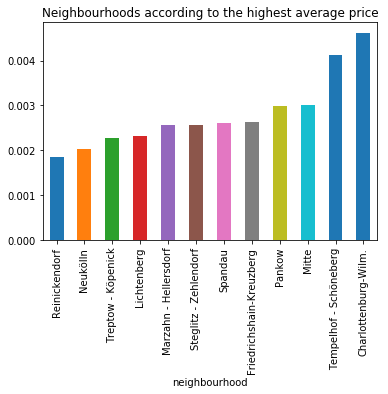

In [43]:
(mean/listings4.shape[0]).plot(kind="bar");
plt.title("Neighbourhoods according to the highest average price");

In [44]:
median = listings4.groupby('neighbourhood')['price'].median().sort_values()

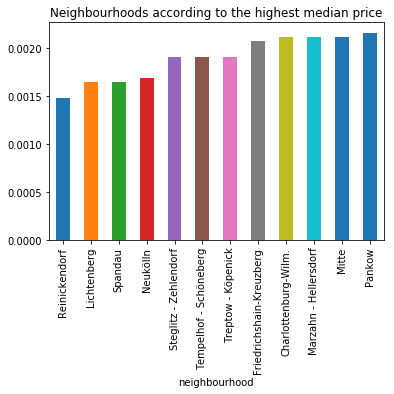

In [45]:
(median/listings4.shape[0]).plot(kind="bar");
plt.title("Neighbourhoods according to the highest median price");

### 4. What are the most important factors for the price of an AirBnB accommodation in Berlin?

In order to answer this question I will perform  Ridge Regression on the Berlin dataset with some dummy features for neighbourhood and property type. 

In [46]:
listings5 = listings4.drop(['neighbourhood','property_type'], axis=1)

In [47]:
fill_mode = lambda col: col.fillna(col.mode()[0])

listings6 = listings5.apply(fill_mode, axis=0)

In [48]:
listings6.head(1)

,id,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,security_deposit,guests_included,minimum_nights,...,Pension (South Korea),Resort,Serviced apartment,Tiny house,Tipi,Townhouse,Train,Treehouse,Vacation home,Villa
0,2015,7.0,3,1.0,1.0,2.0,60.0,250.0,1,6,...,0,0,0,0,0,0,0,0,0,0


In [49]:
listings7 = listings6.fillna(0)

In [50]:

y = listings7['price']



In [51]:
X = listings7.drop(['price'], axis=1)

In [52]:
X.head(1)

,id,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,security_deposit,guests_included,minimum_nights,maximum_nights,...,Pension (South Korea),Resort,Serviced apartment,Tiny house,Tipi,Townhouse,Train,Treehouse,Vacation home,Villa
0,2015,7.0,3,1.0,1.0,2.0,250.0,1,6,1125,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# Source for this part of code is the Udacity Data Science Nanodegree course material

def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

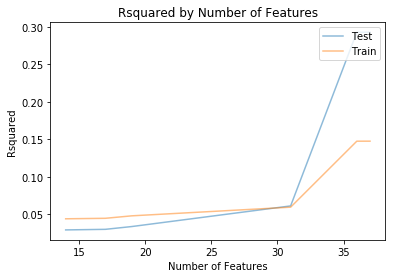

In [56]:
# Source for this part of code: Udacity Data Science Nanodegree course material
# Cutoffs here pertains to the number of missing values allowed in the used columns.
# Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [57]:
# Source: Udacity Data Science Nanodegree course material
print(X_train.shape[1]) #Number of columns
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2

37
0.29275291300496187
0.14740784499262216


In [58]:
# Source: Udacity Data Science Nanodegree couse material

def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

# Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

# Look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
12,Charlottenburg-Wilm.,2.499790e+13,2.499790e+13
16,Mitte,2.499790e+13,2.499790e+13
18,Pankow,2.499790e+13,2.499790e+13
13,Friedrichshain-Kreuzberg,2.499790e+13,2.499790e+13
14,Lichtenberg,2.499790e+13,2.499790e+13
22,Tempelhof - Schöneberg,2.499790e+13,2.499790e+13
21,Steglitz - Zehlendorf,2.499790e+13,2.499790e+13
17,Neukölln,2.499790e+13,2.499790e+13
23,Treptow - Köpenick,2.499790e+13,2.499790e+13
19,Reinickendorf,2.499790e+13,2.499790e+13


Not surprisingly the biggest factors for the price are some neighbourhoods and (to some extent acommodation types).